In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
gendercolors = ["#ffb6c1", "#b6e6ff"]
sns.set_palette(gendercolors)

In [ ]:
titanic = pd.read_csv('titanic.csv')

In [ ]:
titanic.head()

In [ ]:
sns.barplot(x="Sex", y="Survived", data=titanic)

Видимо, тонуть на корабле безопаснее, будучи женщиной.

In [7]:
print('Выжило женщин:')
print(titanic['Survived'][titanic['Sex']=='female'].value_counts(normalize=True))
print('')
print('Выжило мужчин:')
print(titanic['Survived'][titanic['Sex']=='male'].value_counts(normalize=True))

Выжило женщин:
1    0.742038
0    0.257962
Name: Survived, dtype: float64

Выжило мужчин:
0    0.811092
1    0.188908
Name: Survived, dtype: float64


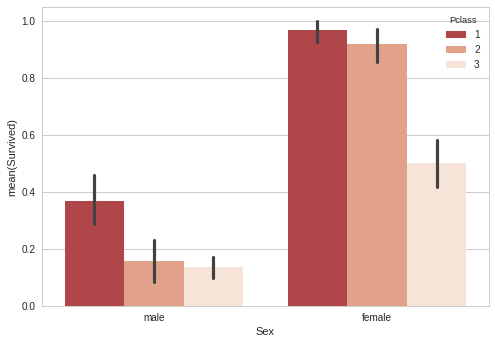

In [8]:
sns.set_palette("RdBu")
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic);

Для мужчин из 1 класса и женщин из 1 и 2 классов вероятность выжить была почти вдвое больше, чем для мужчин 2 и 3 классов и женщин 3 класса соответственно. Но даже быть женщиной 3 класса было безопаснее, чем мужчиной 1 класса (впрочем, ненамного).

In [9]:
def print_chances_by_class(gender):
    gr = 'женщин' if gender=='female' else 'мужчин'
    for i in range(1, 4):
        sex = titanic['Sex']==gender
        pclass = titanic['Pclass']==i
        print('Вероятность выжить для {} класса '.format(gr)+str(i)+':')
        print(titanic['Survived'][sex & pclass].value_counts(normalize=True))
        print('')

In [10]:
for gender in 'female', 'male':
    print_chances_by_class(gender)

Вероятность выжить для женщин класса 1:
1    0.968085
0    0.031915
Name: Survived, dtype: float64

Вероятность выжить для женщин класса 2:
1    0.921053
0    0.078947
Name: Survived, dtype: float64

Вероятность выжить для женщин класса 3:
1    0.5
0    0.5
Name: Survived, dtype: float64

Вероятность выжить для мужчин класса 1:
0    0.631148
1    0.368852
Name: Survived, dtype: float64

Вероятность выжить для мужчин класса 2:
0    0.842593
1    0.157407
Name: Survived, dtype: float64

Вероятность выжить для мужчин класса 3:
0    0.864553
1    0.135447
Name: Survived, dtype: float64



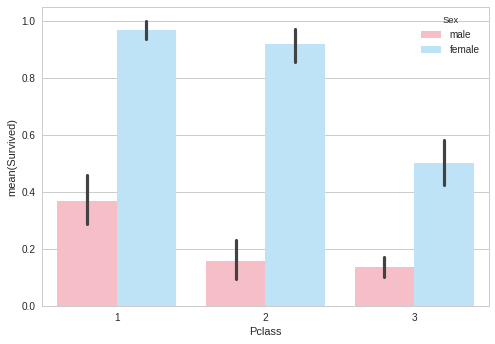

In [11]:
sns.set_palette(gendercolors)
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=titanic);

In [12]:
for i in range(1, 4):
    print('Вероятность выживания для пассажира {} класса: '.format(i))
    print(titanic['Survived'][titanic['Pclass']==i].value_counts(normalize=True))
    print('')

Вероятность выживания для пассажира 1 класса: 
1    0.62963
0    0.37037
Name: Survived, dtype: float64

Вероятность выживания для пассажира 2 класса: 
0    0.527174
1    0.472826
Name: Survived, dtype: float64

Вероятность выживания для пассажира 3 класса: 
0    0.757637
1    0.242363
Name: Survived, dtype: float64



In [13]:
age = titanic["Age"].fillna(28.0)

In [14]:
titanic["Age"] = age

In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [16]:
embarked = titanic["Embarked"].fillna("S")
titanic["Embarked"] = embarked
titanic["Sex"][titanic["Sex"] == "male"] = 0
titanic["Sex"][titanic["Sex"] == "female"] = 1
titanic["Embarked"][titanic["Embarked"] == "S"] = 0
titanic["Embarked"][titanic["Embarked"] == "C"] = 1
titanic["Embarked"][titanic["Embarked"] == "Q"] = 2
titanic["Family"] = titanic["SibSp"] + titanic["Parch"]

/home/religofsil/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/religofsil/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/religofsil/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/religofsil/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: Settin

In [17]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0


In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from IPython.display import Image
from sklearn.metrics import roc_auc_score
import pydotplus
param_grid = {'max_depth': np.arange(2, 7)}

In [37]:
data = titanic[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family']].values
target = titanic['Survived'].values
clf = GridSearchCV(tree.DecisionTreeClassifier(), param_grid)
scores = cross_val_score(clf, data, target, cv=10)

In [38]:
scores

array([ 0.75555556,  0.82222222,  0.74157303,  0.79775281,  0.84269663,
        0.7752809 ,  0.79775281,  0.78651685,  0.85393258,  0.85227273])

In [39]:
clf.fit(data, target)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([2, 3, 4, 5, 6])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [40]:
clf.best_params_

{'max_depth': 6}

In [44]:
clf2 = tree.DecisionTreeClassifier(max_depth = 6)
clf2.fit(data, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

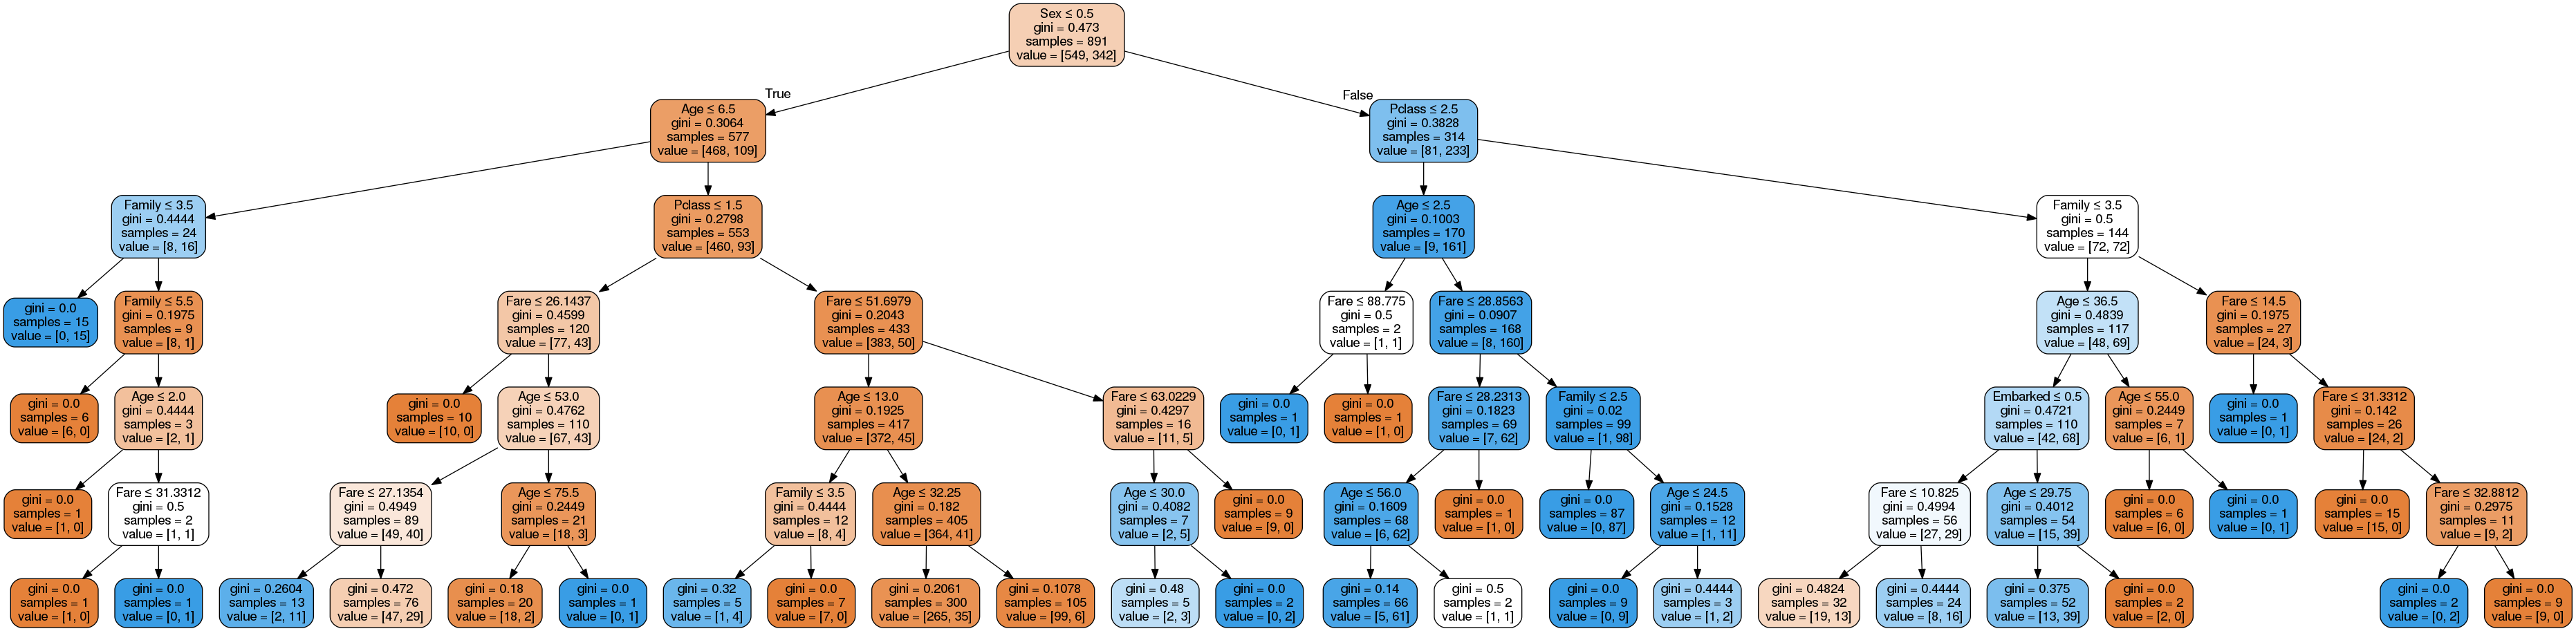

In [56]:
dot_data = tree.export_graphviz(clf2, out_file=None,
                         feature_names=['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family'],
                         class_names=None,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=0)

In [59]:
clf3 = tree.DecisionTreeClassifier(max_depth = 6)
clf3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

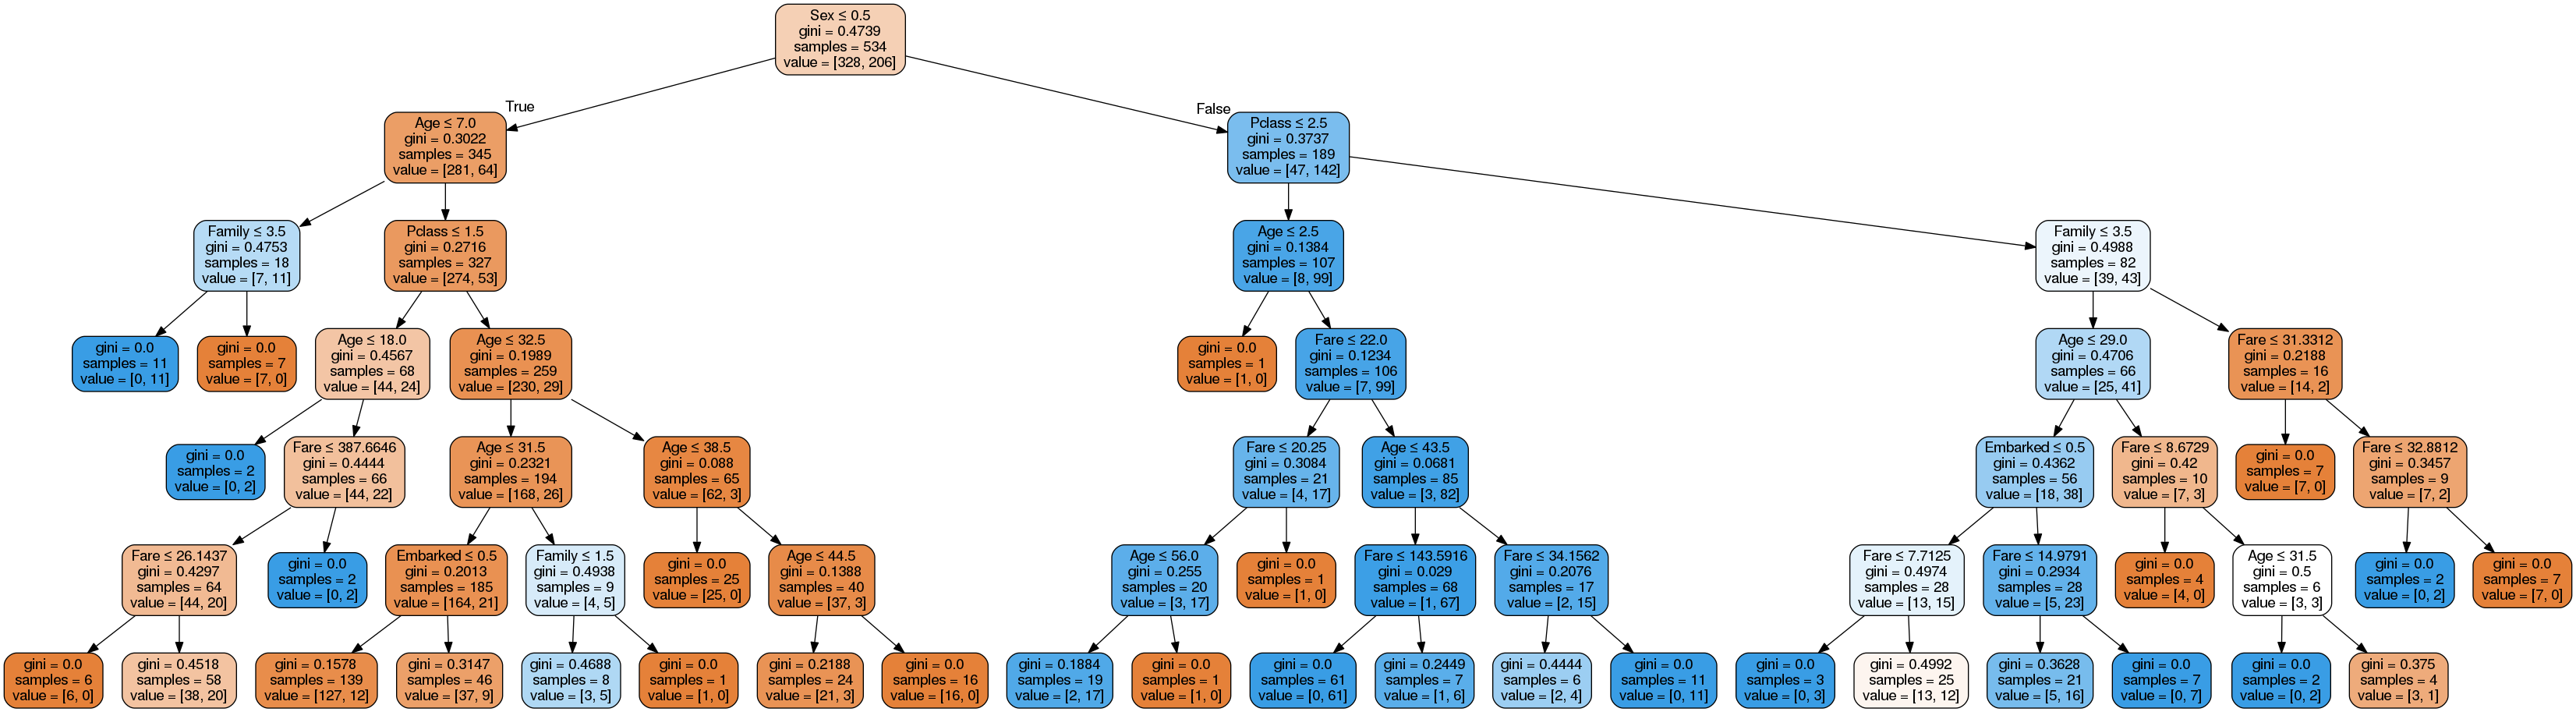

In [60]:
dot_data = tree.export_graphviz(clf3, out_file=None,
                         feature_names=['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family'],
                         class_names=None,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [61]:
roc_auc_score(y_test, clf3.predict(X_test))

0.7607466063348417

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf3.predict(X_test)))

             precision    recall  f1-score   support

          0       0.79      0.92      0.85       221
          1       0.82      0.60      0.69       136

avg / total       0.80      0.80      0.79       357



В общем, из этого отчёта мы можем видеть, что модель правильно угадывает выжившего в 8 случаях из 10 (это неплохой результат, но недостаточно хороший), причём склонна скорее считать человека умершим, чем выжившим (для умерших больше полнота, чем для выживших, и чуть меньше точность). И в принципе с мёртвыми она работает лучше, чем с выжившими, судя по f1-score.

In [66]:
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier()
clf4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [67]:
roc_auc_score(y_test, clf4.predict(X_test))

0.77177601809954754

In [68]:
print(classification_report(y_test, clf4.predict(X_test)))

             precision    recall  f1-score   support

          0       0.82      0.86      0.84       221
          1       0.75      0.68      0.72       136

avg / total       0.79      0.79      0.79       357



In [ ]:
Случайный лес, кажется, сработал немного хуже дерева решений.